In [4]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

## 概述

### 1.matplotlib的三层api
matplotlib的原理或者说基础逻辑是，使用artist对象在画布canvas上绘制render图形<br>
matplotlib.backend_bases.FigureCanvas 绘图区<br>
matplotlib.backend_bases.Renderer 渲染器，可以理解为如何在canvas上画图<br>
matploylib.artist.Artist 具体的图表组件

## 详解matplotlib.artist.Artist
artist有两种类型primitives和containers<br>
primitive是基本要素，包含一些标准图形对象，即每种图形属于那种对象<br>
container是容器，用来装基本要素，包括图形figure，坐标系axes和坐标轴axis

### 基本要素primitives
- 重点介绍primitives的几种类型：曲线-line2D，矩形-Rectangle，多边形-polygon，图像image

#### Line-2D
- Line2D的属性
    - xdata:x轴数据集，若忽略，则默认range(1,len(ydata)+1)
    - ydata:y轴数据集
    - linewidth:线宽
    - linestyle:线型
    - color:颜色
    - marker:点的形状
    - markersize:点的大小
    - markeredgecolor:点的边框颜色
    - markeredgewidth:点的边框宽度

##### 设置Line2D的属性的三种方法
- 直接在plot()函数中设置
- 通过获取线对象，在线对象中设置
- 获得线属性，使用setp()函数设置

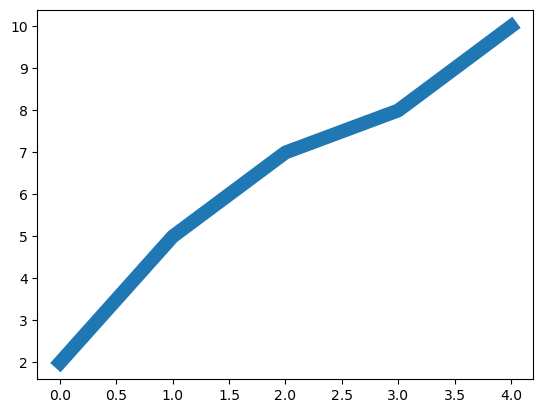

In [2]:
# 1-直接在plot()函数中设置
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y,linewidth=10); #设置线的粗细为10

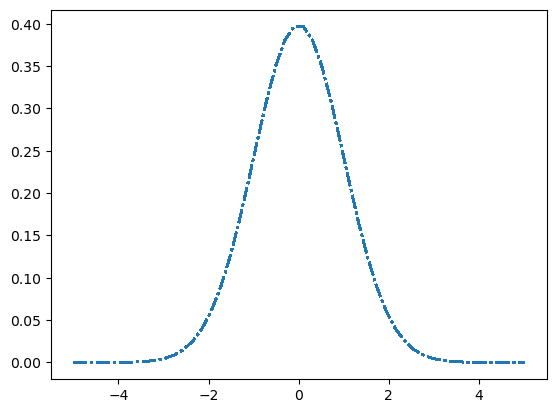

In [21]:
# 2-通过获得线对象，对线对象进行设置
from scipy.stats import norm
x = np.linspace(-5,5,50)
y = norm.pdf(x,0,1)
line, = plt.plot(x,y,'--') 
line.set_linestyle('-.')
'''
在 Matplotlib 中，plt.plot() 函数用于绘制二维图形，
并返回一个包含 Line2D 对象的列表。Line2D 对象是 Matplotlib 中的一个 
artist，它代表绘制的线条。Line2D 对象包含了与线条相关的各种属性和方法。
'''
line.set_antialiased(False) # 关闭抗锯齿功能


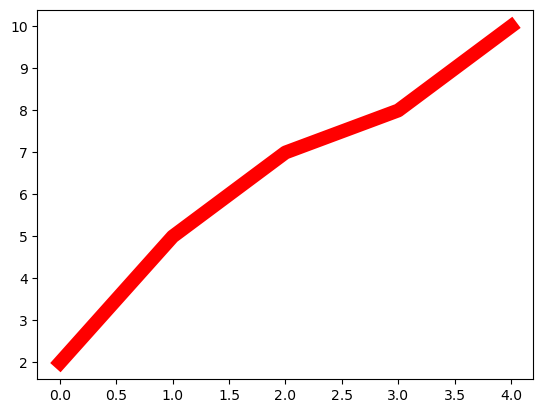

In [25]:
# 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x,y)
plt.setp(lines,color='r',linewidth=10);
# 批量设置先对象的属性，理解成全局设置

##### 绘制直线line
- 1 plt.plot()方法绘制
- 2 Line2D方法绘制


<Axes.ArtistList of 2 lines>


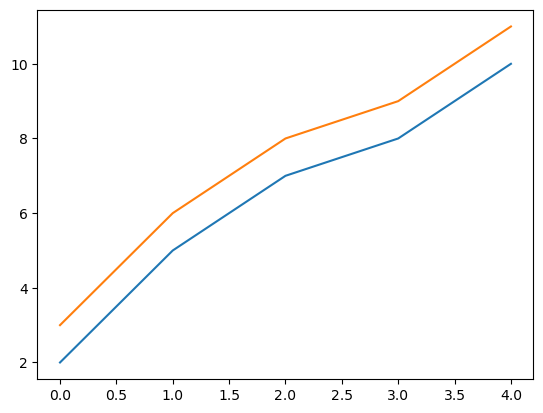

In [ ]:
# 1-绘制直线line
x = range(0,5)
y1 = [2,5,7,8,10]
y2 = [3,6,8,9,11]
fig,ax = plt.subplots()
ax.plot(x,y1)
ax.plot(x,y2)
print(ax.lines);# 通过直接使用辅助方法画线，
 # 打印ax.lines后可以看到在matplotlib在底层创建了两个Line2D对象

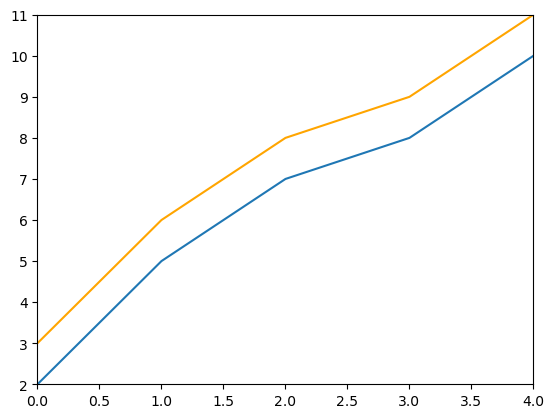

In [36]:
# 2-Line2D对象绘制
x = range(0,5)
y1 = [2,5,7,8,10]
y2 = [3,6,8,9,11]
fig,ax = plt.subplots()
lines = [Line2D(x,y1),Line2D(x,y2,color='orange')]#显示创建Line2D对象
for line in lines:
    ax.add_line(line) #使用add_line方法将创建的Line2D添加到子图中
ax.set_xlim(0,4)
ax.set_ylim(2,11);

##### 绘制误差折线图errorbar
- errorbar中的主要参数
    - x：需要绘制的line中点的在x轴上的取值
    - y：需要绘制的line中点的在y轴上的取值
    - yerr：指定y轴水平的误差
    - xerr：指定x轴水平的误差
    - fmt：指定折线图中某个点的颜色，形状，线条风格，例如‘co--’
    - ecolor：指定error bar的颜色
    - elinewidth：指定error bar的线条宽度

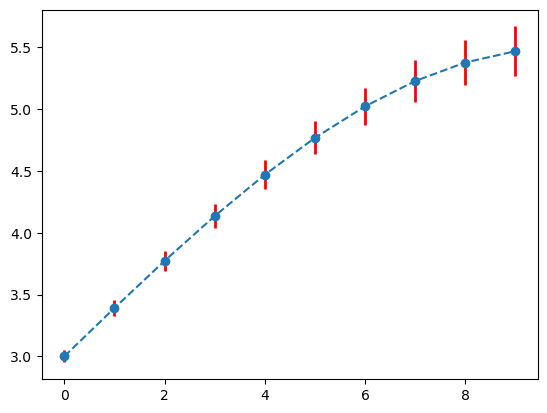

In [41]:
fig = plt.figure()
x = np.arange(10)
y = 2.5*np.sin(x/20*np.pi)
yerr = np.linspace(0.05,0.2,10)
plt.errorbar(x,y+3,yerr=yerr,fmt='o--',ecolor='r',elinewidth=2)
plt.show()